# Market Basket Analysis
is a popular data mining technique **used in retail to discover associations between items in a transaction database**.

The goal is to **identify which items are frequently purchased together** and to understand the patterns in customer behavior. 

In [1]:
#%pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
# Set pandas to display all rows
pd.set_option('display.max_rows', None)
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

c:\Users\sumit\anaconda3\Lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [2]:
df = pd.read_csv('market.csv', delimiter=';')
df.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price,CustomerID',
       'Country,,'],
      dtype='object')

In [3]:
df.head()

,BillNo,Itemname,Quantity,Date,"Price,CustomerID","Country,,"
536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,"United Kingdom,,"
536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,"United Kingdom,,"
536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,"United Kingdom,,"
536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,"United Kingdom,,"
536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,"United Kingdom,,"


In [4]:
df.shape

(522064, 6)

In [5]:
df.isnull().sum()

BillNo                2154
Itemname                 2
Quantity              1231
Date                  1231
Price,CustomerID    134573
Country,,             1231
dtype: int64

In [6]:
df.describe()
print(df.columns)

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price,CustomerID',
       'Country,,'],
      dtype='object')


# Data Preprocessing

In [7]:
df.dropna(subset=['Itemname'],inplace=True)
df.shape
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.shape

(515113, 6)

In [9]:
df.describe()

,"Price,CustomerID"
count,382240.000000
mean,15310.328359
std,1722.544592
min,12346.000000
25%,13930.000000
50%,15249.000000
75%,16820.000000
max,18287.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515113 entries, 536365 to 581587
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BillNo            513741 non-null  object 
 1   Itemname          515113 non-null  object 
 2   Quantity          514883 non-null  object 
 3   Date              514883 non-null  object 
 4   Price,CustomerID  382240 non-null  float64
 5   Country,,         514883 non-null  object 
dtypes: float64(1), object(5)
memory usage: 27.5+ MB


In [11]:
df.shape

(515113, 6)

In [12]:
df.apply(pd.Series.nunique)

BillNo               4377
Itemname              699
Quantity            19638
Date                 1285
Price,CustomerID     4297
Country,,              87
dtype: int64

# Data Visualisation (EDA)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515113 entries, 536365 to 581587
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BillNo            513741 non-null  object 
 1   Itemname          515113 non-null  object 
 2   Quantity          514883 non-null  object 
 3   Date              514883 non-null  object 
 4   Price,CustomerID  382240 non-null  float64
 5   Country,,         514883 non-null  object 
dtypes: float64(1), object(5)
memory usage: 27.5+ MB


In [14]:
df.describe()

,"Price,CustomerID"
count,382240.000000
mean,15310.328359
std,1722.544592
min,12346.000000
25%,13930.000000
50%,15249.000000
75%,16820.000000
max,18287.000000


In [15]:
product_counts = df["Itemname"].value_counts()

In [16]:
product_counts.head(20)

1      142994
2       80016
12      58127
6       39156
4       37320
3       36435
24      22868
10      21707
8       12639
5       11610
48       5719
25       4965
20       4878
16       4105
36       3657
7        2900
9        1993
72       1831
100      1784
18       1722
Name: Itemname, dtype: int64

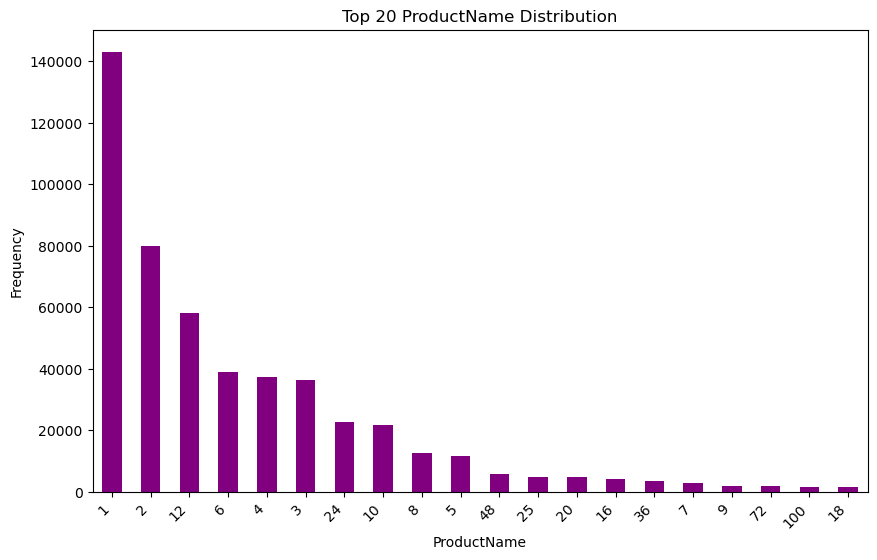

In [17]:
import matplotlib.pyplot as plt

product_counts.head(20).plot(kind='bar', figsize=(10, 6), color="purple")
plt.title('Top 20 ProductName Distribution')
plt.xlabel('ProductName')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
df.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price,CustomerID',
       'Country,,'],
      dtype='object')

# Perform One-Hot Encoding to separate each itemname into binary format

In [19]:
# Preprocessing the data
data_processed = df[['BillNo', 'Itemname']]
data_encoded = pd.get_dummies(data_processed, columns=['Itemname'])
data_encoded.columns = data_encoded.columns.str.replace("Itemname_", "")
basket = data_encoded.groupby('BillNo').sum()

In [20]:
pd.set_option('display.max_columns', None)
basket.head(10)

,-1,-10,-100,-1000,-101,-102,-103,-104,-105,-1050,-106,-1060,-108,-109,-1092,-11,-110,-1100,-111,-1121,-1128,-1131,-114,-115,-1158,-116,-117,-118,-12,-120,-1200,-1206,-121,-124,-125,-126,-1277,-1284,-129,-13,-130,-1300,-131,-135,-138,-139,-14,-140,-1400,-1430,-144,-1440,-145,-147,-1479,-149,-15,-150,-151,-1510,-1512,-152,-153,-154,-155,-156,-1560,-158,-16,-160,-161,-162,-164,-1671,-168,-1681,-169,-17,-170,-173,-175,-177,-178,-179,-18,-180,-184,-186,-188,-1897,-19,-192,-194,-197,-2,-20,-200,-2003,-201,-203,-204,-206,-207,-209,-21,-210,-212,-217,-22,-220,-223,-224,-227,-23,-230,-231,-232,-234,-235,-2376,-24,-240,-242,-2472,-25,-250,-251,-252,-256,-259,-26,-2600,-2618,-267,-27,-270,-271,-272,-275,-278,-28,-280,-2834,-288,-2880,-29,-290,-3,-30,-300,-3000,-304,-306,-31,-310,-3100,-313,-3167,-32,-320,-323,-324,-327,-33,-335,-337,-338,-34,-342,-343,-345,-346,-35,-355,-36,-360,-365,-3667,-37,-38,-380,-384,-39,-390,-391,-398,-4,-40,-400,-408,-41,-413,-42,-428,-43,-430,-432,-434,-44,-443,-45,-450,-455,-458,-46,-47,-472,-48,-4830,-484,-49,-5,-50,-504,-51,-52,-524,-53,-530,-5368,-54,-541,-55,-550,-553,-56,-57,-576,-58,-59,-590,-6,-60,-600,-61,-618,-62,-620,-63,-635,-64,-65,-657,-66,-664,-67,-674,-675,-68,-682,-69,-690,-696,-7,-70,-71,-72,-723,-73,-74,-741,-75,-750,-752,-77,-78,-786,-8,-80,-800,-81,-82,-83,-84,-840,-86,-864,-87,-88,-9,-90,-900,-905,-9058,-91,-92,-93,-939,-94,-95,-96,-9600,-967,-97,-975,-98,-99,-990,1,10,100,1000,1008,101,1010,102,1020,104,105,1056,106,107,108,109,11,110,111,112,1120,113,1130,114,115,1152,116,117,118,12,120,1200,121,122,123,124,125,12540,126,128,1284,1287,129,1296,13,130,1300,131,132,133,135,1350,1356,136,137,138,139,1394,14,140,1400,1404,141,1412,142,1428,143,144,1440,145,146,147,148,1488,149,15,150,1500,151,1515,152,153,1540,155,156,157,158,16,160,1600,162,163,164,165,167,168,17,170,171,172,1728,175,176,177,1788,179,18,180,181,1820,1824,183,184,186,1878,188,19,1900,192,193,1930,1944,196,197,198,199,1992,2,20,200,2000,204,2040,205,207,208,21,210,2100,211,212,213,215,216,2160,219,22,220,222,224,225,227,228,23,230,232,234,236,24,240,2400,242,244,245,246,248,249,25,250,252,253,255,256,2560,257,258,2592,26,261,264,267,268,27,270,2700,272,273,276,279,28,280,281,288,2880,29,291,3,30,300,3000,304,306,31,310,3100,3114,312,314,3186,32,320,323,324,326,33,330,335,336,34,342,344,348,35,350,352,36,360,37,370,374,375,378,38,384,388,39,3906,392,396,4,40,400,4000,402,404,408,41,410,416,42,420,425,428,43,430,4300,432,44,448,45,450,456,46,460,462,468,47,478,48,480,4800,484,49,490,492,494,496,5,50,500,504,51,512,52,528,53,54,540,55,552,5568,56,560,57,576,58,588,59,6,60,600,608,61,612,62,620,624,628,63,630,637,64,640,648,65,654,66,660,666,67,670,672,68,682,684,688,69,696,698,7,70,700,701,708,71,72,720,73,738,74,74215,744,75,750,752,756,76,760,768,77,774,78,79,8,80,800,80995,81,82,824,828,83,832,84,840,85,852,86,860,864,87,88,888,89,9,90,900,906,91,912,92,93,94,95,96,960,968,97,972,98,99,992,"Australia,,","Austria,,","Belgium,,","France,,","Germany,,","Netherlands,,","Spain,,","Switzerland,,","United Kingdom,,"
BillNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
*Boombox Ipod Classic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Perform Market Basket Analysis

Key Concepts in Market Basket Analysis:
* Itemsets: A collection of one or more items. For example, {bread, milk} is an itemset.

* Support: It's a measure of how frequently an itemset appears in the data. Mathematically, it is calculated as:

**Support= 
Number of transactions containing the itemset / Total number of transactions**

* Confidence: Confidence is a measure of how often items in Y appear in transactions that contain X. It is used to evaluate the accuracy of a rule. Mathematically:

**Confidence
(𝑋→𝑌)=
Support
(𝑋∪𝑌)
Support
(𝑋)
Confidence(X→Y)= 
Support(X)
Support(X∪Y)**

 
This tells us how likely Y is purchased when X is purchased.

* Lift: Lift measures the strength of an association rule over the random co-occurrence of X and Y. A lift greater than 1 indicates a positive association, meaning the presence of X increases the likelihood of Y. Mathematically:

Lift
(
𝑋
→
𝑌
)
=
Confidence
(
𝑋
→
𝑌
)
Support
(
𝑌
)
Lift(X→Y)= 
Support(Y)
Confidence(X→Y)
​


In [21]:
# Convert the DataFrame to boolean values (True/False)
basket_bool = basket > 0

What It Does: Converts the DataFrame values to boolean (True/False), where True indicates the presence of an item in a transaction and False indicates its absence. This transformation is necessary because the apriori algorithm requires binary input to identify frequent itemsets.

In [22]:
# Now, run the apriori algorithm
frequent_itemsets = apriori(basket_bool, min_support=0.02, use_colnames=True)

What It Does: Applies the apriori algorithm to the boolean DataFrame basket_bool to generate frequent itemsets that meet the minimum support threshold of 0.02 (i.e., itemsets that appear in at least 2% of transactions). The use_colnames=True parameter ensures that the item names are preserved in the output, which makes interpretation easier. 

In [23]:
frequent_itemsets.head()

,support,itemsets
0,0.826594,(1)
1,0.307973,(10)
2,0.045693,(100)
3,0.119717,(11)
4,0.543294,(12)


In [28]:
# Generate association rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

What It Does: Generates association rules from the frequent itemsets where the confidence level is at least 0.5. This means that the rules generated will have a confidence of at least 50%, indicating that the consequent (Y) is present in at least 50% of the transactions where the antecedent (X) is present.

# Lift Analysis

In [29]:
# Perform lift analysis by sorting rules by lift and filtering by a minimum lift threshold
lift_threshold = 1.0  # You can adjust this threshold
lift_analysis = rules[rules['lift'] > lift_threshold].sort_values(by='lift', ascending=False)

What It Does: Filters and sorts the association rules based on the lift metric. Only rules with a lift greater than 1 are retained, as these indicate a positive association between the items. The rules are then sorted in descending order of lift, so the strongest associations appear first.

In [30]:
lift_analysis.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.036174,0.036421,0.025485,0.704514,19.343514,0.024167,3.261000,0.983894
51,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.036421,0.036174,0.025485,0.699728,19.343514,0.024167,3.209847,0.984147
47,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028207,0.048248,0.025485,0.903509,18.726262,0.024124,9.863609,0.974074
52,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.048248,0.028207,0.025485,0.528205,18.726262,0.024124,2.059779,0.994586
17,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048248,0.036421,0.029939,0.620513,17.037124,0.028181,2.539160,0.989023


In [31]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.039489,0.063292,0.021526,0.545113,8.612697,0.019027,2.059210,0.920232
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.037559,0.047852,0.020338,0.541502,11.316103,0.018541,2.076667,0.947207
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.050821,0.047852,0.031324,0.616358,12.880423,0.028892,2.481867,0.971748
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.047852,0.050821,0.031324,0.654602,12.880423,0.028892,2.748071,0.968718
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.037559,0.050821,0.022466,0.598155,11.769743,0.020558,2.362054,0.950746


# Summary > Interpreting the result

* **antecedent support:** The proportion of transactions in which the antecedent appears. For the first rule, 0.039489 means that 60 TEATIME FAIRY CAKE CASES appears in approximately 3.95% of transactions.

* **consequent support:** The proportion of transactions in which the consequent appears. For the first rule, 0.063292 means that PACK OF 72 RETROSPOT CAKE CASES appears in approximately 6.33% of transactions.

* **support:** The proportion of transactions that contain both the antecedent and consequent. For the first rule, 0.021526 means that both items appear together in approximately 2.15% of transactions.

* **confidence:** The probability of the consequent given the antecedent. For the first rule, 0.545113 indicates that when 60 TEATIME FAIRY CAKE CASES is purchased, PACK OF 72 RETROSPOT CAKE CASES is purchased in approximately 54.5% of those transactions.

* **lift:** Measures the strength of the association between antecedent and consequent. For the first rule, 8.612697 means that the likelihood of purchasing PACK OF 72 RETROSPOT CAKE CASES given 60 TEATIME FAIRY CAKE CASES is 8.61 times greater than if the items were purchased independently. A lift greater than 1 indicates a positive relationship.

* **leverage:** Shows the difference between the observed support and the expected support if the items were independent. For the first rule, 0.019027 indicates a positive association, as the value is greater than 0.

* **conviction:** Measures how likely the rule is to be true given the absence of the antecedent. For the first rule, 2.059210 suggests that the likelihood of PACK OF 72 RETROSPOT CAKE CASES being purchased given the absence of 60 TEATIME FAIRY CAKE CASES is about 2.06 times more likely than if the items were independent.

* **zhangs_metric:** Another metric for evaluating the strength of association rules. This metric is less commonly used but can provide additional insights.